In [3]:
import os
import netCDF4
import numpy as np
import pandas as pd
import requests
import io
import seaborn as sns

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

from matplotlib.collections import LineCollection
from matplotlib.path import Path
import matplotlib.path as mpath
import matplotlib.patches as patches

Station Data
https://legacy.bas.ac.uk/met/READER/surface/Amundsen_Scott.All.temperature.txt
datetime
1957    0.651953
1958    0.593620
1959   -0.248047
1960   -0.239714
1961    0.151953
          ...   
2016    0.326953
2017    0.885286
2018    2.060286
2019    0.751953
2020    0.968620
Name: Anomaly, Length: 64, dtype: float64


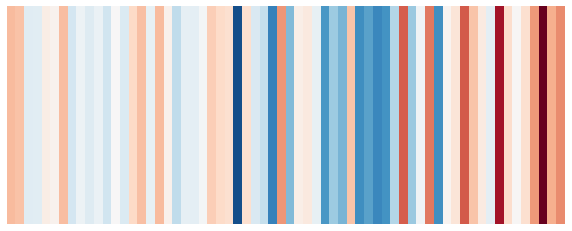

In [4]:
######################
#STATION DATA
######################
print('Station Data')
#load data AP stations
url = 'https://legacy.bas.ac.uk/met/READER/surface/'

#Station
O_filenames = ['Orcadas','Bellingshausen','Esperanza','Marambio','Faraday','Rothera','San_Martin','Mirny','Casey','Dumont_Durville','Mawson','Davis','Syowa','Neumayer','Novolazarevskaya','Halley','Belgrano_II','McMurdo','Vostok','Amundsen_Scott']
filename = 'Amundsen_Scott'

print(url + filename + '.All.temperature.txt')
s=requests.get(url + filename + '.All.temperature.txt').content
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df = pd.read_csv(io.StringIO(s.decode('utf-8')), delim_whitespace=True, na_values='-', skiprows=1, names=['YEAR', 1,2,3,4,5,6,7,8,9,10,11,12])
df = pd.melt(df, id_vars='YEAR', value_vars=[1,2,3,4,5,6,7,8,9,10,11,12], var_name='MONTH', value_name='T')
df['DAY'] = 1
df = df.sort_values(['YEAR', 'MONTH'])
df['datetime'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(['YEAR','MONTH','DAY'], axis=1)
df = df.set_index('datetime')

#Mean temperature of a month averages
min_years_for_averages = 10
df_m = df.groupby(df.index.year).agg(['count', 'mean'])
O_mean = df_m[df_m['T']['count'] >= min_years_for_averages]['T']['mean'].mean()
df_m['Anomaly'] = df_m['T']['mean']-O_mean
O_anom = df_m[df_m['T']['count'] >= min_years_for_averages]['Anomaly']
print(O_anom)

######################
#PLOT STRIPES
######################    
fig = plt.figure(figsize=[10,4])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'RdBu_r'
sns.heatmap(data=[O_anom.values,O_anom.values],
           cmap=cmap, cbar=False,
           center=0.,
           xticklabels=False, yticklabels=False,
           )
#plt.plot(O_anom.index, T_Ant, '-k', zorder=5)
plt.savefig('StripePlot_'+filename+'.png', dpi=300)
